In [469]:
import pandas as pd

In [470]:
df = pd.read_csv("data/flights_train.csv", index_col=0, parse_dates=True)

In [471]:
df.head(5)

,passengers
date,
1949-01-01,64
1949-02-01,75
1949-03-01,98
1949-04-01,93
1949-05-01,80


In [472]:
df.isna().value_counts()

passengers
False         132
dtype: int64

In [473]:
df['timestep'] = list(range(len(df)))

In [474]:
df

,passengers,timestep
date,,
1949-01-01,64,0
1949-02-01,75,1
1949-03-01,98,2
1949-04-01,93,3
1949-05-01,80,4
...,...,...
1959-08-01,430,127
1959-09-01,383,128
1959-10-01,351,129


In [475]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='date', ylabel='passengers'>

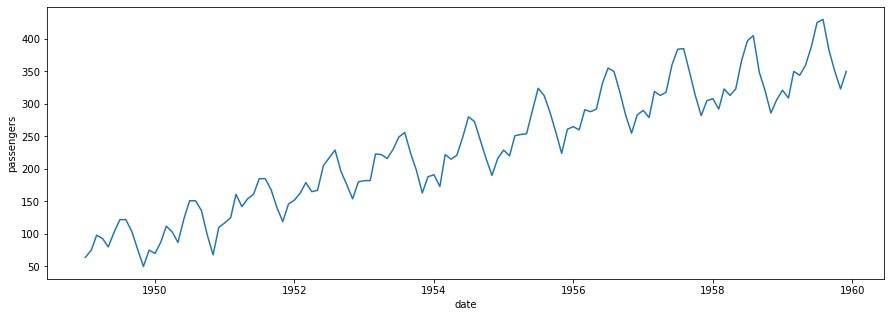

In [476]:
fig = plt.gcf()
fig.set_size_inches(15, 5)
sns.lineplot(data=df, x="date", y="passengers")

In [477]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [478]:
m = LinearRegression()

In [479]:
X = df[['timestep']]
y = df['passengers']

In [480]:
m.fit(X,y)

LinearRegression()

In [481]:
result = m.predict(X)

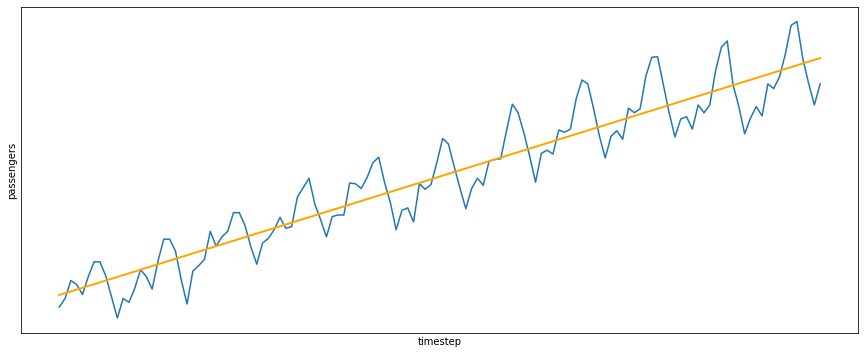

<Figure size 1440x720 with 0 Axes>

In [482]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
sns.lineplot(data=df, x="timestep", y="passengers")
plt.plot(X, result, color="orange", linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()
sns.despine()

In [483]:
df['trend'] = result

In [484]:
from sklearn.preprocessing import PolynomialFeatures

pl = PolynomialFeatures(degree=5)
X2 = pl.fit_transform(X)

In [485]:
X2

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02, 3.12500000e+03],
       [1.00000000e+00, 6.00000000e+00, 3.60000000e+01, 2.16000000e+02,
        1.29600000e+03, 7.77600000e+03],
       [1.00000000e+00, 7.00000000e+00, 4.90000000e+01, 3.43000000e+02,
        2.40100000e+03, 1.68070000e+04],
       [1.00000000e+00, 8.00000000e+00, 6.40000000e+01, 5.12000000e+02,
        4.09600000e+03, 

In [486]:
m2 = LinearRegression()

In [487]:
m2.fit(X2,y)

LinearRegression()

In [488]:
result2 = m2.predict(X2)

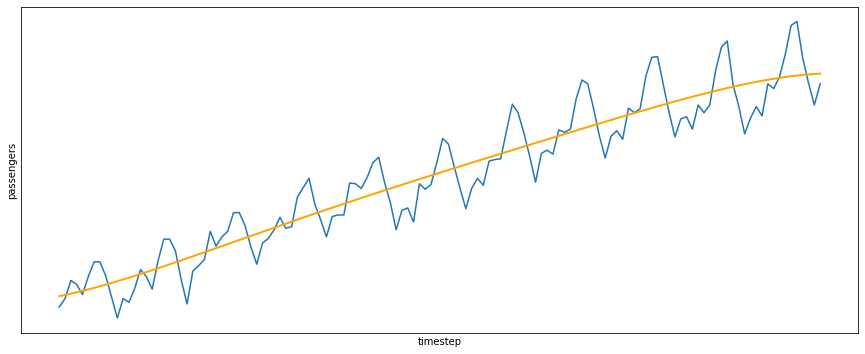

In [489]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
sns.lineplot(data=df, x="timestep", y="passengers")
plt.plot(X, result2, color="orange", linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

In [490]:
df['detrended'] = df['passengers'] - df['trend']

In [491]:
seasonal_dummies = pd.get_dummies(df.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(df.index)

flights = df.join(seasonal_dummies)

In [492]:
flights.head(5)

,passengers,timestep,trend,detrended,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,
1949-01-01,64,0,79.444293,-15.444293,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,75,1,81.761937,-6.761937,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,98,2,84.079581,13.920419,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,93,3,86.397226,6.602774,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,80,4,88.714870,-8.714870,0,0,0,1,0,0,0,0,0,0,0


In [493]:
X3 = flights[flights.columns[-11:]]
y3 = flights['detrended']

In [494]:
X3['timestep'] = flights['timestep']

/tmp/ipykernel_7122/4014910338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3['timestep'] = flights['timestep']


In [495]:
X3

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,timestep
date,,,,,,,,,,,,
1949-01-01,0,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,1,0,0,0,0,0,0,0,0,0,0,1
1949-03-01,0,1,0,0,0,0,0,0,0,0,0,2
1949-04-01,0,0,1,0,0,0,0,0,0,0,0,3
1949-05-01,0,0,0,1,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1959-08-01,0,0,0,0,0,0,1,0,0,0,0,127
1959-09-01,0,0,0,0,0,0,0,1,0,0,0,128
1959-10-01,0,0,0,0,0,0,0,0,1,0,0,129


In [496]:
m3 = LinearRegression()

In [497]:
m3.fit(X3, y3)

LinearRegression()

In [498]:
result3 = m3.predict(X3)
flights['seasonality'] = result3

In [499]:
flights['trend_seasonal'] = flights['trend'] + flights['seasonality']

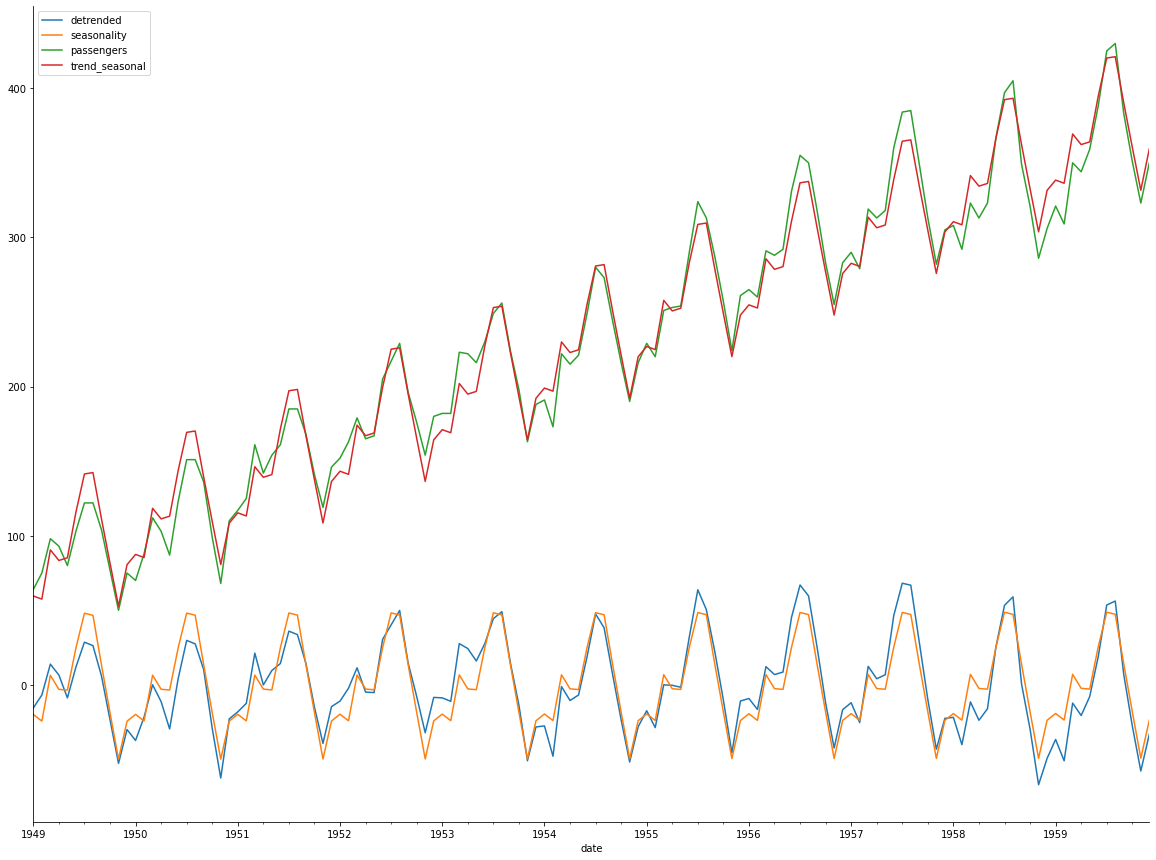

In [500]:
flights[['detrended', "seasonality", "passengers", "trend_seasonal"]].plot(figsize=(20,15), legend=True)
sns.despine()

In [501]:
flights['remainder'] = flights['detrended'] - flights['seasonality']

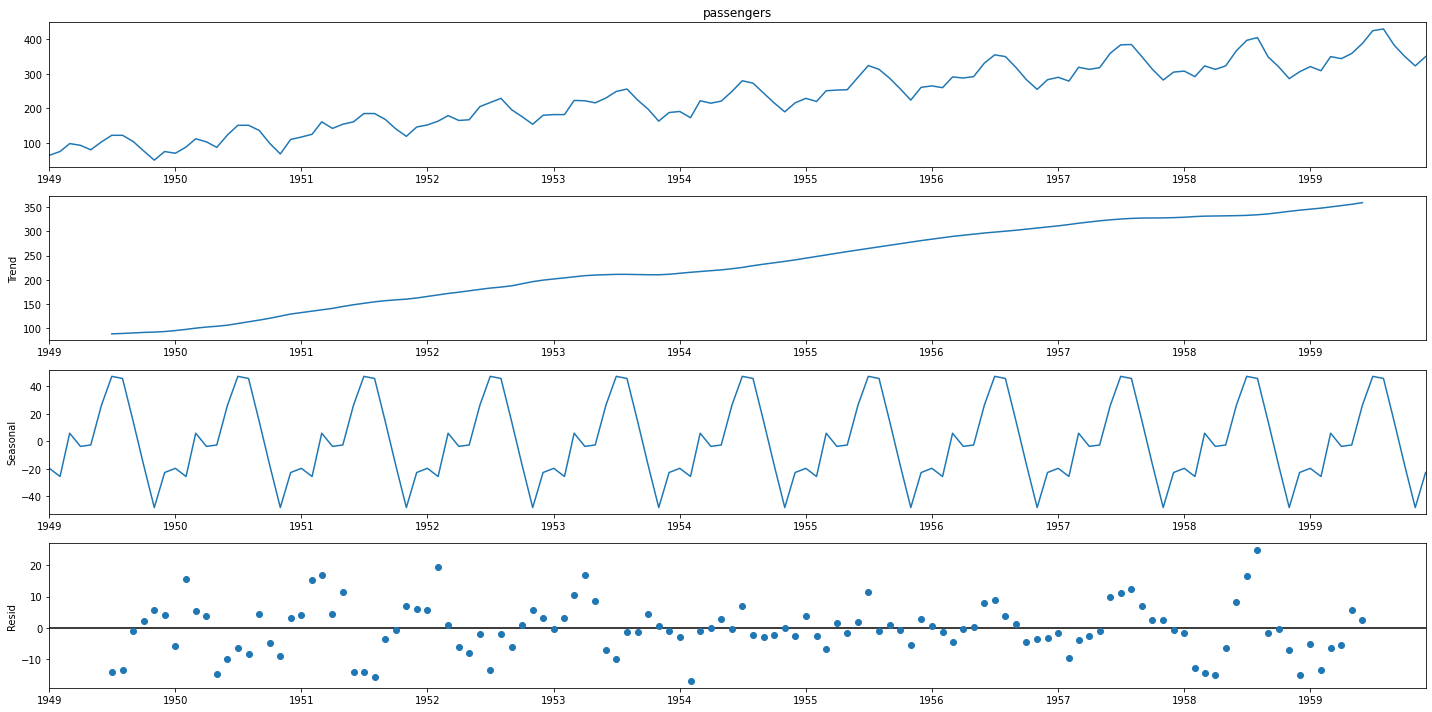

In [502]:
from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose(flights['passengers'], model='additive')

plt.rcParams['figure.figsize'] = (20,10)
sd.plot()
None

<AxesSubplot:xlabel='date'>

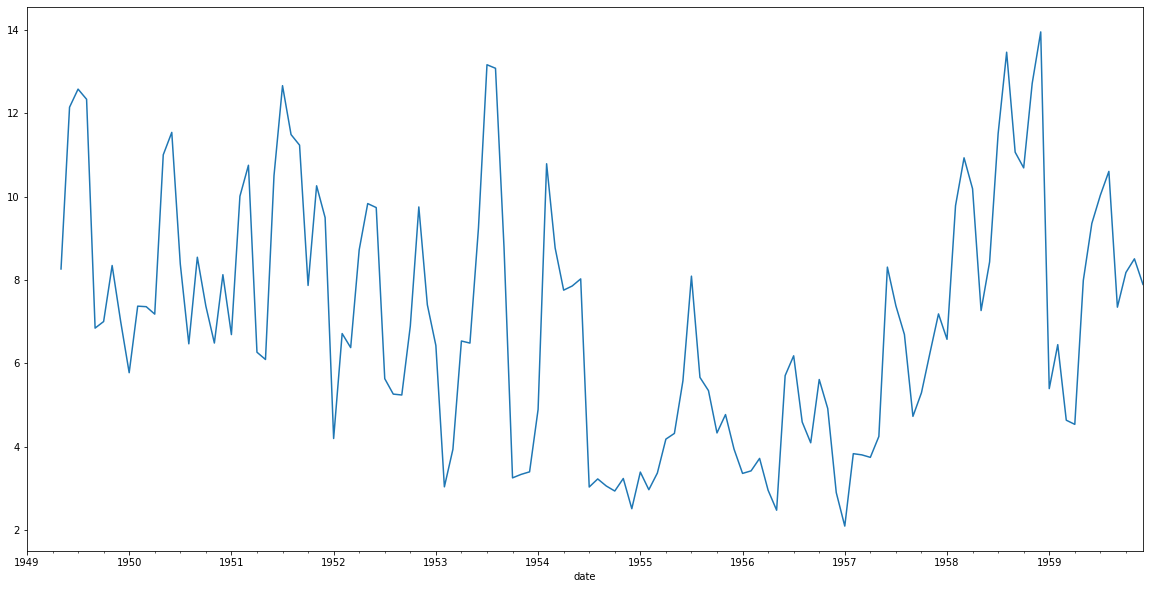

In [503]:
flights['remainder'].rolling(window=5).std().plot()